# 1025_Class_Logistic map
## 107022138

## introduction
<font size = 4>
$$
    x_{n+1} = \alpha x_n(1-x_n)
$$<br>
  We will assume $x$ is restricted to the domain $(0,1)$.  
    
</font>

## Tasks: Plot the function and find the attractor
<font size = 4>
Set $\alpha=0.8$ and choose some initial point $x_0$, iterate $f$ and convince yourself that they all are attracted to zero. It might be helpful to plot $x_n$ v.s. $n$.<br>
Plot $f$ and the diagonal $y=x$ on the same plot.<br> Are there any fixed-points other than $x=0$?
Repeat for $\alpha=1.2$, $\alpha=2.8$, $\alpha=3.2$. What happens?
</font>

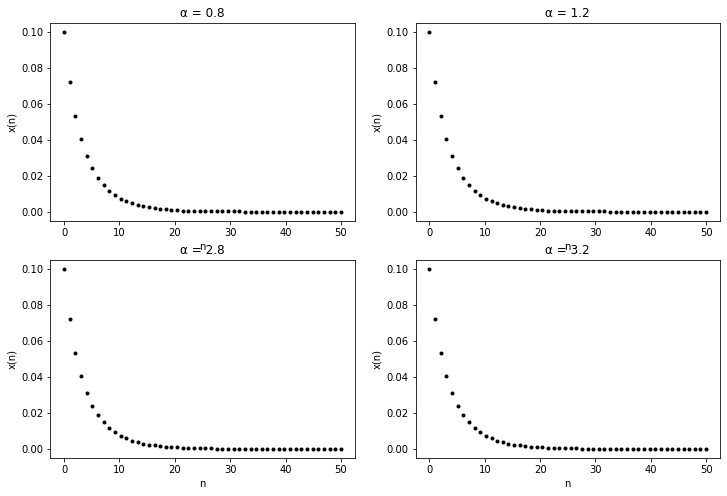

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 50   #步數
x = np.empty(N)
α = [0.8 , 1.2 , 2.8 , 3.2]
x[0] = 0.1
n = np.linspace(0,N,N)
a = np.linspace(0,1)


fig, axes = plt.subplots(ncols = 2, nrows = 2 , figsize = (12,8))
ax = axes.flatten()

for i in range(0,N-1):
    x[i+1] = α[0]*x[i]*(1-x[i])

for i in range(4):
    ax[i].set_title('α = ' + str(α[i]))
    ax[i].plot(n,x,'ko',markersize = 3)
    ax[i].set_xlabel('n')
    ax[i].set_ylabel('x(n)')


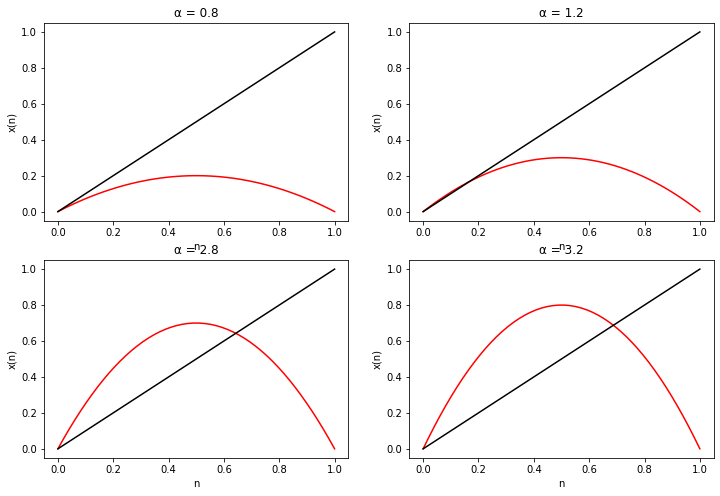

In [71]:
N = 50   #步數
x = np.empty(N)
α = [0.8 , 1.2 , 2.8 , 3.2]
x[0] = 0.1
a = np.linspace(0,1)

fig, axes = plt.subplots(ncols = 2, nrows = 2 , figsize = (12,8))
ax = axes.flatten()

for i in range(0,N-1):
    x[i+1] = α[0]*x[i]*(1-x[i])

for i in range(4):
    b = α[i] * a *(1-a)
    ax[i].set_title('α = ' + str(α[i]))
    ax[i].plot(a,b,'r')
    ax[i].plot(a,a,'k')
    ax[i].set_xlabel('n')
    ax[i].set_ylabel('x(n)')
    

## Tasks: Trajectory of the attractor
<font size = 4>
On the same graph, plot $f$, the diagonal $y=x$, and the trajectory $\{x_0, x_0\}$, $\{x_0, f(x_0)\}$, $\{f(x_0), f(x_0)\}$, $\{f(x_0), f(fx_0)\}$, $\dots$ for $\alpha=2.8, 3.2, 3.52, 3.54, 4.00$. Describe their differences.
</font>

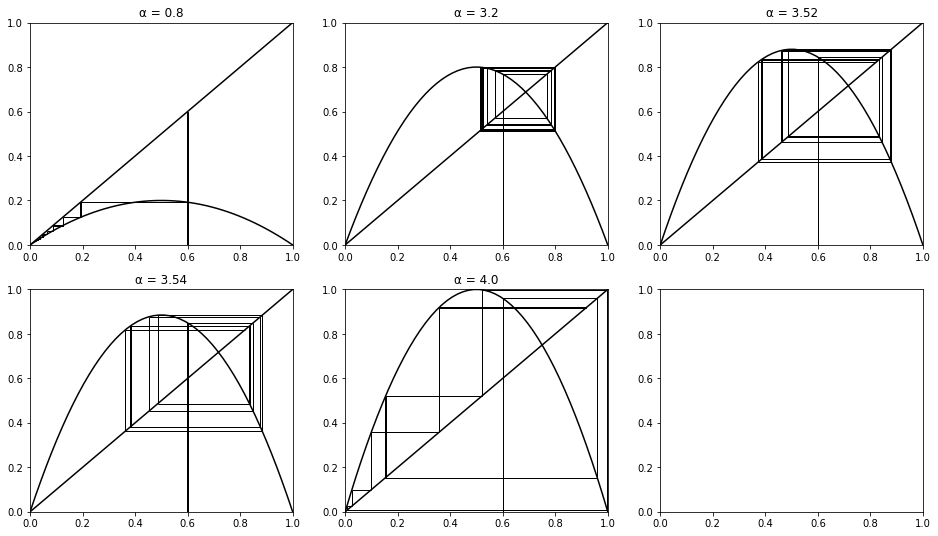

In [69]:
N = 10    #步數
x = np.empty(N)
α = [0.8,3.2,3.52,3.54,4.00]
x[0] = 0.6
a = np.linspace(0,1)

fig, axes = plt.subplots(ncols = 3, nrows = 2 , figsize = (16,9))
ax = axes.flatten()

for ii in range(5):
    b = α[ii] * a *(1-a)
    ax[ii].plot(a,b,'k')
    ax[ii].plot(a,a,'k')
    ax[ii].set_title('α = ' + str(α[ii]))

    for i in range(0,N-1):
        x[i+1] = α[ii]*x[i]*(1-x[i])
        ax[ii].arrow(x[i],x[i],0,x[i+1]-x[i],width = 0.001,head_width = 0.0,length_includes_head = True,color ='k')
        ax[ii].arrow(x[i],x[i+1],x[i+1]-x[i],0,width = 0.001,head_width = 0.0,length_includes_head = True,color ='k')
        
        ax[ii].set_ylim([0,1])
        ax[ii].set_xlim([0,1])
        
        ax[ii].arrow(x[0],0,0,x[1],width = 0.001,head_width = 0.0,length_includes_head = True,color ='k')

# plt.arrow(x[0],0,0,x[1],width = 0.001,head_width = 0.0,length_includes_head = True,color ='k')


## Tasks: Bifucation diagram
<font size = 4>
Plot the attractor as a function of $\alpha$ for $0 <\alpha <4$.
</font>

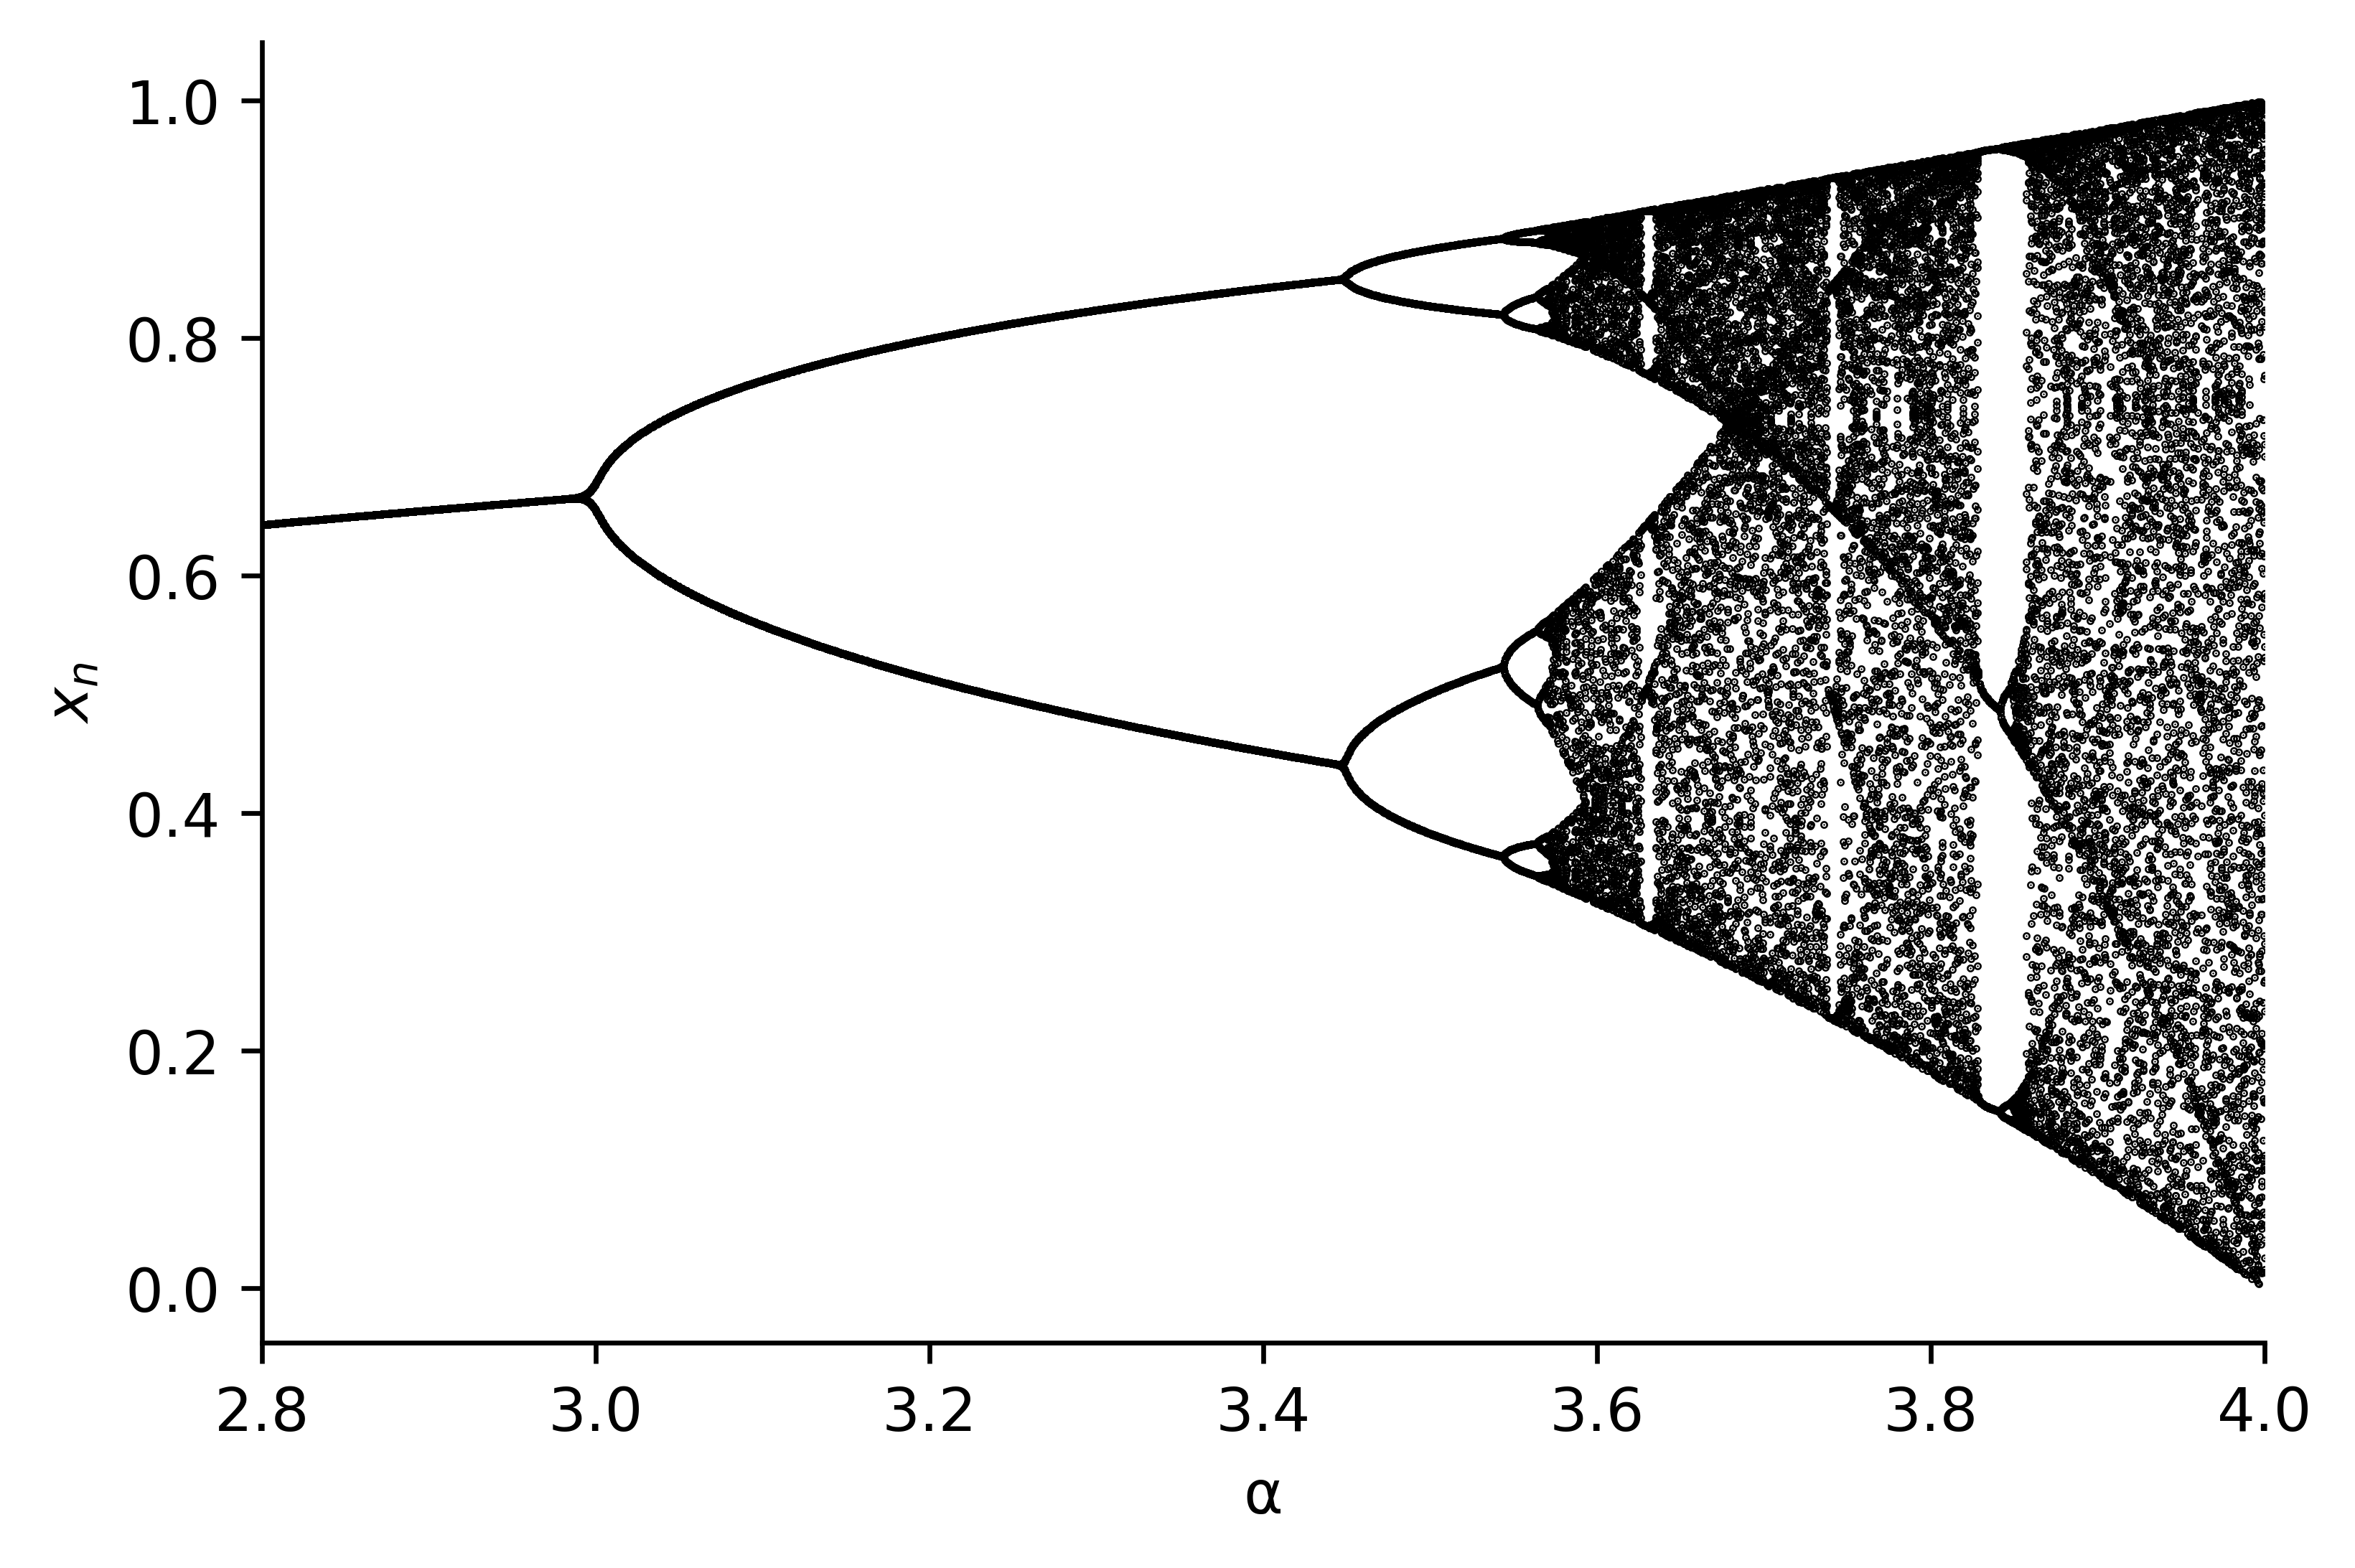

In [9]:
N = 400  # N-N2 is step number before starting plot
N1 = 2000  # N1 is the number of equal diversion point
N2 = 30  # N2 is plot points
x = np.zeros(N)
α = np.linspace(2.8,4,N1)
αp = np.zeros(N2*N1)

plt.figure(dpi = 600)
ax = plt.axes()

for k in range(N2*N1):
    αp[k] = α[int(k/N2)]
        
for i in range(0,N1):
    x[0] = 0.6
    for j in range(0,N-1):
        x[j+1] = α[i]*x[j]*(1-x[j])
    plt.plot(αp[N2*i:N2*(i+1)],x[-N2:N],'k.',markersize = 0.6)
plt.xlim([2.8,4.0])
plt.xlabel('α')
plt.ylabel(r'$x_n$')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


## Tasks: three cycle
<font size = 4 >
Consider the case when $\alpha=3.82831$ and $x_0=0.51$. Show that a three cycle occurs with the approximate $x$ values 0.16, 0.52, and 0.96 for the first 80 cycles before the behavior apparently turns chaotic. Find for what iteration that next apparently periodic cycle occurs and for how many cycles it stays periodic?
</font>

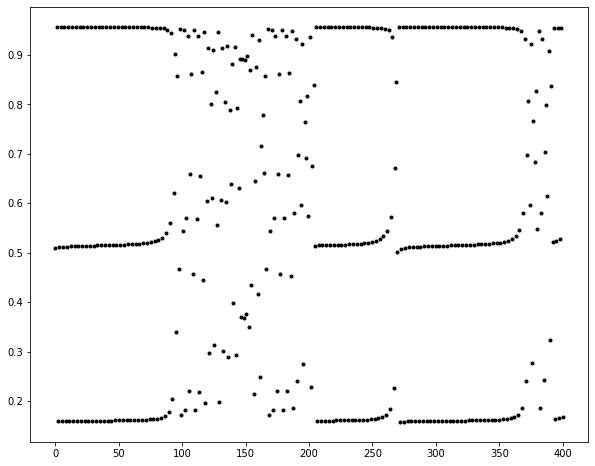

In [29]:
N = 400   #步數
x = np.empty(N)
α = 3.82831
x[0] = 0.51
n = np.linspace(0,N,N)

plt.figure(figsize = (10,8))
# fig, axes = plt.subplots(ncols = 2, nrows = 2 , figsize = (12,8))
# ax = axes.flatten()

for i in range(0,N-1):
    x[i+1] = α*x[i]*(1-x[i])
plt.plot(n,x,'k.')


    

## Tasks: Feigenbaum number
<font size = 4>
Find $\alpha_n$ where n-th bifurcation occurs.<br>
Calculate$$
\delta_n \equiv \frac{\alpha_n-\alpha_{n-1}}{\alpha_{n+1}-\alpha_n}
$$<br> and plot $\delta_n$ v.s. $n$.
Convince yourself that $\delta_n$ converge to the Feigenbaum number $\delta=4.6692016091029909\dots$.
</font>